# DBTL 3 data analysis

This notebook analyzes OD340 and OD600 data from DBTL cycle 1 of a flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import edd_utils as eddu

### User parameters

In [2]:
CYCLE = 3

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'study_slug': 'combinatorial-media-for-flaviolin-dbtl-3',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
    } 

In [3]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [4]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [5]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/96 [00:00<?, ?it/s]

In [6]:
df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148929,Combinatorial media for flaviolin DBTL 3,148930,C3_WA1_C1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148978,C3_WA1_C1-R1,NaN,Optical Density,0,NaN,1.492,48.0
1,148929,Combinatorial media for flaviolin DBTL 3,148931,C3_WA1_C1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148979,C3_WA1_C1-R2,NaN,Optical Density,0,NaN,1.016,48.0
2,148929,Combinatorial media for flaviolin DBTL 3,148932,C3_WA1_C1-R3,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148980,C3_WA1_C1-R3,NaN,Optical Density,0,NaN,1.299,48.0
3,148929,Combinatorial media for flaviolin DBTL 3,148933,C3_WD1_F1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148981,C3_WD1_F1-R1,NaN,Optical Density,0,NaN,1.048,48.0
4,148929,Combinatorial media for flaviolin DBTL 3,148934,C3_WD1_F1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148982,C3_WD1_F1-R2,NaN,Optical Density,0,NaN,1.129,48.0


Drop unnecessary columns:

In [7]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C3_WA1_C1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.492
1,C3_WA1_C1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.016
2,C3_WA1_C1-R3,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.299
3,C3_WD1_F1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.048
4,C3_WD1_F1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.129


In [8]:
find_col = lambda x: x['Line Name'][5]

def find_row(row):
    line_name = row['Line Name']
    if line_name[4] == 'A':
        if int(line_name[-1]) == 1:
            return "A"
        elif int(line_name[-1]) == 2:
            return "B"
        else:
            return "C"
    else:
        if int(line_name[-1]) == 1:
            return "D"
        elif int(line_name[-1]) == 2:
            return "E"
        else:
            return "F"


In [9]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)


In [10]:
df.head(2)

,Line Name,Line Description,Protocol,Value,Row,Column
0,C3_WA1_C1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.492,A,1
1,C3_WA1_C1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,1.016,B,1


## Coefficient of variation

In [11]:
df_red = df.drop(columns=['Column'])
stats = df_red.groupby(['Protocol', 'Line Description']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df_red.groupby(['Protocol', 'Line Description']).std()
stats['CV[%]'] = 100* stats['std'] / stats['mean']
stats

mean  \
Protocol Line Description                                               
OD340    MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.282433   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.588433   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.577433   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.535533   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.572733   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.577533   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.566700   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.647033   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.579667   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.663333   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.589367   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.593767   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.585100   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.573467   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.563867   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.612133   
OD600    MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.870000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  1.233667   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  1.117000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.885000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.848000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.986333   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.884333   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  1.115667   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.982333   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  1.269000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.975333   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.934333   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  1.012000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  1.016667   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  1.182000   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  1.094333   

                                                                  std  \
Protocol Line Description                                               
OD340    MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.007564   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.059962   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.016399   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.006052   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.013004   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.008145   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.01...  0.027497   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.027315   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.006326   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.051026   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.02...  0.012886   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.017157   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.034767   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.036548   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.036035   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.03...  0.028488   
OD600    MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.131773   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.131165   
         MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.00...  0.045738   
         MOPS: 40.000000, Tricine: 4.000000, H3BO

## Visualization

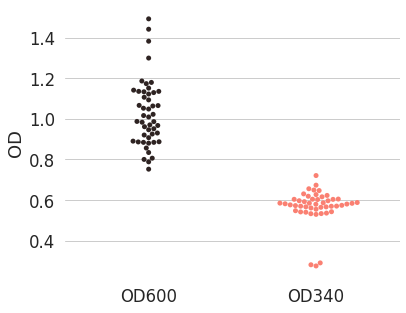

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Protocol',
              y='Value',
              palette="dark:salmon"
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Per line:

In [17]:
line_names = []
df_340 = df[df['Protocol']=='OD340'].reset_index()
for i in range(int(len(df_340)/3)):
    line_names.append(str(df_340['Line Name'][3*i])[3:-3])
# line_names

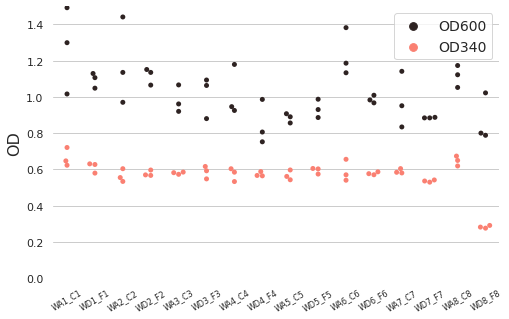

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))
fontsize = 14
sns.set_style("whitegrid")
g = sns.swarmplot(data=df, 
              linewidth=0,
              x='Line Description',
              y='Value',
              hue='Protocol',
              palette="dark:salmon"
              )
g.set_xticklabels(line_names, fontsize=8, rotation = 30)
plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD", fontsize=fontsize+2)
ax.set_xlabel(None)
plt.ylim([0, 1.5])

fig.savefig(
    f"{user_params['output_file_path']}/swarm_per_design.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [18]:
data_od600 = df[df['Protocol']=='OD600'].pivot('Row', 'Column')['Value']
data_od340 = df[df['Protocol']=='OD340'].pivot('Row', 'Column')['Value']

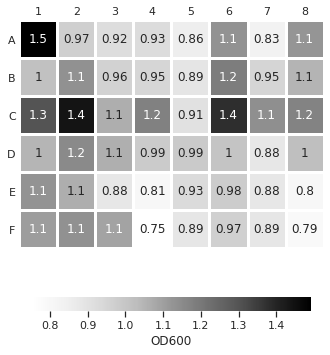

In [66]:
fig = plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
ax = sns.heatmap(data=data_od600, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Greys", #Greys, YlGn
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.5,
                           'label': 'OD600'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation = 0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

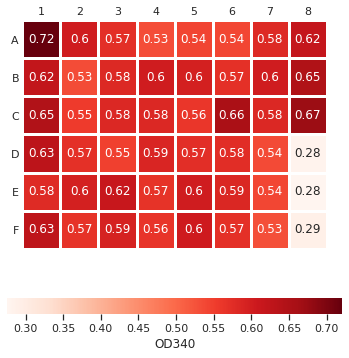

In [67]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Load training data and predictions for recommendations:

In [11]:
user_params['target_designs'] = f'../data/flaviolin/DBTL{CYCLE}/target_concentrations.csv'

In [12]:
designs_pred = pd.read_csv(user_params['target_designs'], index_col=0).reset_index()
designs_pred.drop(columns='Well', inplace=True)
designs_pred['OD340'] = df[df['Protocol']=='OD340']['Value'].values
designs_pred.head()

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340_pred,OD340_std,Label,OD340
0,0.028304,0.203775,2.142815,0.04985,10.682077,1.327616,400.020175,0.000282,0.001039,0.000786,0.002639,0.000014,0.602671,0.066540,exploitation,0.7206
1,0.028304,0.203775,2.142815,0.04985,10.682077,1.327616,400.020175,0.000282,0.001039,0.000786,0.002639,0.000014,0.602671,0.066540,exploitation,0.6227
2,0.028304,0.203775,2.142815,0.04985,10.682077,1.327616,400.020175,0.000282,0.001039,0.000786,0.002639,0.000014,0.602671,0.066540,exploitation,0.6467
3,0.038344,0.196104,2.505369,0.06513,11.989143,3.103421,431.048016,0.000195,0.000292,0.000689,0.002345,0.000014,0.600444,0.066787,exploitation,0.6303
4,0.038344,0.196104,2.505369,0.06513,11.989143,3.103421,431.048016,0.000195,0.000292,0.000689,0.002345,0.000014,0.600444,0.066787,exploitation,0.5793


In [13]:
user_params['train_data'] = f'../data/flaviolin/DBTL{CYCLE}/train_pred.csv'

In [14]:
train_pred = pd.read_csv(user_params['train_data'], index_col=0)
train_pred

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340,OD340_pred,OD340_std,OD340_cv_pred,OD340_cv_std,Label
0,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.4422,0.374856,0.066248,0.478344,0.037749,train
1,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3405,0.374856,0.066248,0.478344,0.037749,train
2,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3397,0.374856,0.066248,0.478344,0.037749,train
3,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3602,0.374856,0.066248,0.478344,0.037749,train
4,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.607910,0.000155,0.000152,0.000029,0.000410,0.000277,0.2699,0.273986,0.066338,0.276293,0.063466,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.002467,0.119844,1.762672,0.081953,8.821329,0.279924,25.780235,0.000205,0.000291,0.000455,0.000170,0.000743,0.3065,0.307097,0.066331,0.410657,0.063867,train
92,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2934,0.295136,0.066248,0.259378,0.057191,standard
93,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2912,0.295136,0.066248,0.259378,0.057191,standard
94,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.3004,0.295136,0.066248,0.259378,0.057191,standard


## Check improvement over the previous cycles

Find control lines (standards)

In [15]:
control_lines = train_pred[train_pred['Label'] == 'standard']
control_lines


,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340,OD340_pred,OD340_std,OD340_cv_pred,OD340_cv_std,Label
44,0.003797,0.311780,1.325974,0.009506,9.927665,0.568441,50.767801,0.000030,0.000296,0.000096,0.000729,0.000102,0.2856,0.286568,0.066244,0.284854,0.055981,standard
45,0.003797,0.311780,1.325974,0.009506,9.927665,0.568441,50.767801,0.000030,0.000296,0.000096,0.000729,0.000102,0.2936,0.286568,0.066244,0.284854,0.055981,standard
46,0.003797,0.311780,1.325974,0.009506,9.927665,0.568441,50.767801,0.000030,0.000296,0.000096,0.000729,0.000102,0.2715,0.286568,0.066244,0.284854,0.055981,standard
47,0.003797,0.311780,1.325974,0.009506,9.927665,0.568441,50.767801,0.000030,0.000296,0.000096,0.000729,0.000102,0.2891,0.286568,0.066244,0.284854,0.055981,standard
92,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2934,0.295136,0.066248,0.259378,0.057191,standard
93,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2912,0.295136,0.066248,0.259378,0.057191,standard
94,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.3004,0.295136,0.066248,0.259378,0.057191,standard
95,0.003929,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095,0.2990,0.295136,0.066248,0.259378,0.057191,standard


Find the mean value for all standard replicates:

In [32]:
stand_mean = np.mean(control_lines['OD340'])
stand_max = np.max(control_lines['OD340'])
stand_mean

0.29047500000000004

Find best design in the train data set:

In [35]:
best_train_mean = np.mean([0.612, 0.5832, 0.6198, 0.6295])
best_train = np.max(train_pred[train_pred['Label'] == 'train']['OD340'])
best_train_mean, best_train

(0.6111249999999999, 0.6295)

Find the best performing replicate in DBTL 3:

In [28]:
best_dbtl3 = np.max(data_od340.values)
best_dbtl3

0.7206

Find the best replicate mean in DBTL 3:

In [31]:
best_dbtl3_mean = np.mean(data_od340.iloc[:3,0])


In [23]:
data_od340

Column,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.7206,0.6036,0.5726,0.5327,0.5425,0.5400,0.5802,0.6187
B,0.6227,0.5333,0.5816,0.6033,0.5966,0.5698,0.6041,0.6492
C,0.6467,0.5547,0.5848,0.5844,0.5610,0.6555,0.5838,0.6732
D,0.6303,0.5694,0.5474,0.5877,0.5740,0.5761,0.5357,0.2813
E,0.5793,0.5963,0.6159,0.5663,0.6025,0.5863,0.5415,0.2755
F,0.6268,0.5666,0.5920,0.5642,0.6048,0.5702,0.5294,0.2905


### Improvement of the best in DBTL 3 over the standard

Mean values:

In [46]:
f'The mean value over replicates for the best design in DBTL 3 improved the mean value for standard media designs by {(best_dbtl3_mean/stand_mean - 1)*100:.4}%'


'The mean value over replicates for the best design in DBTL 3 improved the mean value for standard media designs by 128.4%'

Absolute replicate values:

In [44]:
f'The best replicate in DBTL 3 improved the best replicate of standard media designs by {(best_dbtl3/stand_max - 1)*100:.4}%'


'The best replicate in DBTL 3 improved the best replicate of standard media designs by 139.9%'

In [52]:
(best_dbtl3/stand_mean - 1)

1.4807642654273172

### Improvement of the best in DBTL 3 over the best in the train set

Mean values:

In [50]:
f'The mean value over replicates for the best design in DBTL 3 improved the best mean value in the train data set by {(best_dbtl3_mean/best_train_mean - 1)*100:.3}%'


'The mean value over replicates for the best design in DBTL 3 improved the best mean value in the train data set by 8.54%'

Absolute replicate values:

In [51]:
f'The best replicate in DBTL 3 improved the best one in the train data set by {(best_dbtl3/best_train - 1)*100:.3}%'

'The best replicate in DBTL 3 improved the best one in the train data set by 14.5%'

In [121]:
from sklearn.metrics import r2_score

def predictions_vs_observations(
    designs,
    train,
    errorbars_flag=False,
    xlim=None,
    ylim=None,
):
    
    plt.style.use("seaborn-white")

    fontsize = 20

    fig, ax = plt.subplots(figsize=(7, 7))
    
    obs_all = np.append(train['OD340'], designs['OD340'])
    pred_all = np.append(train['OD340_cv_pred'], designs['OD340_pred'])
    pred_std_all = np.append(train['OD340_cv_std'], designs['OD340_std'])
    
    # Plot Scatter Plot
    if errorbars_flag:
        plt.errorbar(
            obs_all,
            pred_all,
            yerr=1.96 * pred_std_all,
            fmt='none',
            ecolor="lightgray",
            elinewidth=1,
            alpha=0.5,
            zorder=0
        )
            
    plt.scatter(
        train['OD340'], 
        train['OD340_cv_pred'], 
        color="gray",
        label='train'
    )

    standard = train[train['Label']=='standard']
    plt.scatter(
        standard['OD340'], 
        standard['OD340_cv_pred'],
        label='standard',
        color="k"
    )
    
    standard_des = designs[designs['Label']=='standard']
    plt.scatter(standard_des['OD340'], standard_des['OD340_pred'], color="k")
    
    explor_des = designs[designs['Label']=='exploration']
    plt.scatter(
        explor_des['OD340'], 
        explor_des['OD340_pred'], 
        color="orange",
        label='exploration'
    )
    
    exploit_des = designs[designs['Label']=='exploitation']
    plt.scatter(
        exploit_des['OD340'], 
        exploit_des['OD340_pred'], 
        color="r",
        label='exploitation'
    )
    
    r2_train = round(r2_score(train['OD340'], train['OD340_cv_pred']), 2)
    
    r2_all = round(r2_score(obs_all, pred_all), 2)

    ax.set_title(f"$R^2$={r2_train}", fontsize=fontsize)
    ax.set_xlabel("Observations", fontsize=fontsize)
    ax.set_ylabel("Cross-validation predictions", fontsize=fontsize)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    if xlim is None:
        ax.set_xlim(lims)
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim(lims)
    else:
        ax.set_ylim(ylim)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # Plot Diagonal Dashed Line
    ax.plot(lims, lims, ls="--", color=".8", zorder=0)
    
    plt.legend(loc='best', 
#                shadow=False, 
               fontsize=fontsize-4)

    plt.tick_params(axis="both", which="major", labelsize=fontsize)
    plt.show()

    fig.savefig(
        user_params['output_file_path']
        + "/predictions_vs_observations.png",
        bbox_inches="tight",
        transparent=False,
        dpi=300,
    )

    plt.close(fig)

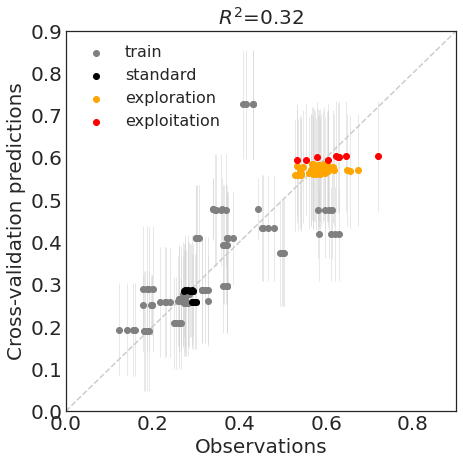

In [122]:
predictions_vs_observations(
    designs=designs_pred,
    train=train_pred,
    errorbars_flag=True,
    xlim=[0., 0.9],
    ylim=[0., 0.9],
)